# Export Objects

These code snippets generate the images used in the README file. The first snippet generates representative data (10 rows from the reduced model) after reforming it to make it more understandable. The second snippet generates an image of the coefficient dataframe that displays the coefficient estimates for the reduced model. In both cases, the *dataframe_image module* is used and must be available in the working environment (note that it is included in the `heart-disease-deploy-env.yaml` file.

The next few snippets export summary statistics generated with *describe()*; a heatmap of the feature correlation matrix; and a representative boxplot illustrating the relationship between the target and a continuous feature. The *dataframe_image* module is used for the summary statistics, while the *figure* class from *matplotlib* is used for the graphs.

In [2]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import df used to estimate the reduced model

heart_model_input_df = pd.read_csv('../Data/heart_model_input.csv')

## Export Representative Data Frame Image

In [4]:
%%script false --no-raise-error
# Make a data frame with representative values for presentation

# Drop unneccessary columns
# Note were are using the reduced model for this

drop_list = ['rest_bp', 'chol', 'blood_sugar', 'restecg', 'age_scaled', 'rest_bp_scaled', 'chol_scaled', 'max_heart_rate_scaled', 'oldpeak_scaled', 'outlier']
heart_model_input_df.drop(drop_list, axis='columns', inplace=True)

In [5]:
%%script false --no-raise-error
# Create a df with a small random sample of the data
# so the Boolean fields aren't all one value
# You may need to run it a few times to get a good sample

random_state = 321

# Make a new df, since we need the full one later

heart_model_sample_df = heart_model_input_df.sample(n = 10, random_state = random_state, replace = False)
heart_model_sample_df.head(10)

In [6]:
%%script false --no-raise-error
# Change Boolean features to text and recode them
# with more understandable names

# Make a dictionary with each column dtype as string
# Then do the cast

cast_list = ['sex', 'chest_pain', 'angina', 'ST_slope', 'flouroscopy', 'heart_defect', 'heart_disease']
cast_dict = {k: 'string' for k in cast_list}
heart_model_cast_df = heart_model_sample_df.astype(cast_dict).copy()

# Now, do the recode
# Sex and flouroscopy have different values and are handled separately

heart_model_cast_df.replace({'sex': {'0': 'Male', '1': 'Female'}}, inplace = True)
heart_model_cast_df.replace({'flouroscopy': {'0': 'Zero', '1': 'Nonzero'}}, inplace = True)

recode_list = ['chest_pain', 'angina', 'ST_slope', 'heart_defect', 'heart_disease']
recode_dict = {k: {'0': 'No', '1': 'Yes'} for k in recode_list}

heart_model_cast_df.replace(recode_dict, inplace=True)
heart_model_cast_df.reset_index(drop=True, inplace=True)

In [7]:
%%script false --no-raise-error
# Generate an image of the df to add to the README

dfi.export(heart_model_cast_df, '../Images/heart_df_present.png')

In [8]:
%%script false --no-raise-error
# Code to export the coefficient dataframe after making it easier to read.

# Load the full coefficient dataframe

coef_df_all = pd.read_csv('../Data/coefficient_df.csv')
coef_df_all.set_index('coef', inplace = True)

In [9]:
%%script false --no-raise-error
# Generate the df containing only the reduced model to export

df = coef_df_all.copy()

# Drop uneccesary columns and rows

df.drop(['clf_all', 'clf_trimmed'], axis='columns', inplace=True)
df.drop(['rest_bp', 'chol', 'blood_sugar', 'restecg'], axis='index', inplace=True)

# Rename column and index so they are easier to understand

df.rename_axis(index= {'coef': 'feature'}, axis='index', inplace=True)
df.rename(columns = {'clf_reduced': 'value'}, inplace=True)

# Round feature column to three decimal places

# df_formatted = df.round({'value': 2})
# df_formatted

pd.options.display.float_format = '{:20,.2f}'.format
dfi.export(df, '../Images/coefficient_figure.png')

In [10]:
%%script false --no-raise-error
# Export summary statistics for the reduced model
# Need to set float format so only two decimals are displayed

pd.options.display.float_format = '{:20,.2f}'.format
cols = ['age', 'max_heart_rate', 'oldpeak']

summary_df = heart_model_input_df[cols].describe()
summary_df
dfi.export(summary_df, '../Images/heart_disease_summary.png')

In [11]:
%%script false --no-raise-error
# Export the correlation matrix for the reduced model
# as a heatmap

pd.options.display.float_format = '{:20,.2f}'.format
cols = ['age', 'max_heart_rate', 'oldpeak']

cors = np.corrcoef(heart_model_input_df[cols], rowvar=False)

heart_heatmap = sns.heatmap(cors, vmin=-1, vmax=1, center=0, cmap="YlGnBu", linewidths = .25, xticklabels = cols, yticklabels=cols)
heart_heatmap

fig = heart_heatmap.get_figure()
fig.savefig('../Images/heart_corr_heatmap.png')

ValueError: The Axes must have been created in the present figure

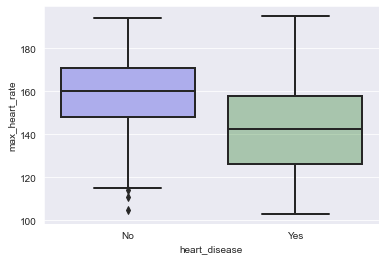

<Figure size 432x288 with 0 Axes>

In [31]:
#%%script false --no-raise-error

# Export a boxplot of the target vs. max_heart_rate
# Color options used to get a more appealing figure

sns.set_style('darkgrid')

# Set colors for features (blue for no disease and green for disease)
# Transparency (0 - 1; 0 is fully transparent)
boxplot_palette = {
     'No': 'b',
     'Yes': 'g'
}

transparency = 0.3

# Recode target to Yes and No

boxplot_df = heart_model_input_df[
    heart_model_input_df['outlier'] == False] \
    .loc[:, ['max_heart_rate', 'heart_disease']].copy()

boxplot_df.replace(
    {
        'heart_disease': {0: 'No', 1: 'Yes'}
    }, inplace=True)

# Define the plot; outliers are excluded
# so difference in distributions is clearer

ax = sns.boxplot(x="heart_disease", y="max_heart_rate",
            data=boxplot_df,
            palette = boxplot_palette,
            linewidth = 2)

# Set the transparency

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, transparency))
    
fig = plt.figure()
fig.add_axes(ax)
    
plt.show()

# Export to PNG

plt.savefig('../Images/boxplot_heart_rate_vs_disease.png')